El movimiento oscilatorio armónico es un modelo físico en el cual una partícula oscila en torno a una posición de equilibrio. En este caso vamos a analizar el movimiento oscilatorio armónico en una dimensión en los casos simple, amortiguado y forzado. La ecuación que analiza este modelo físico es la siguiente:

$$
a + \frac{b}{m} v + \frac{k}{m}x = \frac{F}{m} sin(w_{f}t) 
$$

esto es lo mismo que:

$$
\frac{d^{2}x}{dt^{2}} + \frac{b}{m} \frac{dx}{dt} + \frac{k}{m}x = \frac{F}{m} sin(w_{f}t) 
$$

Donde:\
$a$ es la asceleracion\
$v$ es la velocidad\
$m$ es la masa de la partícula\
$b$ es la constante de amortiguamiento\
$k$ es la constante de elasticidad\
$F$ es la fuerza oscilante\
$w_{f}$  es la frecuencia oscilante

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [42]:
def ma(p0, m, k, b, F, w): 

    """
    p0 = posicion inicial 
    m = es la masa de la partícula
    b = es la constante de amortiguamiento
    k = es la constante de elasticidad
    F = es la fuerza oscilante
    w = es la frecuencia oscilante
    """

    plt.figure(figsize=(10,8)) # creamos la figura que tendra los 3 osciladores armonicos 
    
    def df1(f1,t): # funcion para crear el recorrido del movimiento armonico forzado 
        x1, v1 = f1[0], f1[1] 
        dx1 = v1  
        dv1 = (F/m)*np.sin(w*t) - (b/m)*v1 - (k/m)*x1  # ecuacion que describe el forzamiento 
        return [dx1,dv1]
    
    def df2(f2,t): # funcion para crear el recorrido del movimiento armonico amortiguado
        x2, v2 = f2[0], f2[1] 
        dx2 = v2  
        dv2 = - (b/m)*v2 - (k/m)*x2 # ecuacion que describe el amortiguamiento 
        return [dx2,dv2]
    
    def df3(f3,t): # funcion para crear el recorrido del movimiento armonico simple
        x3, v3 = f3[0], f3[1] 
        dx3 = v3  
        dv3 = - (k/m)*x3 # ecuacion que describe el simple 
        return [dx3,dv3]

    t = np.linspace(0,20,500) # los tres tipos de movimientos armonicos se moveran entre 0 y 20 segundos, con 500 puntos entre 0 y 20
    sol1 = odeint(df1, p0, t) # usamos la funcion odeint de integrate para resolver la ecuacion diferencial
    sol2 = odeint(df2, p0, t) # usamos la funcion odeint de integrate para resolver la ecuacion diferencial
    sol3 = odeint(df3, p0, t) # usamos la funcion odeint de integrate para resolver la ecuacion diferencial
    f1 = sol1[:,0] # la primera columna que necesitamos seran losa valores que usaremos para graficar  
    f2 = sol2[:,0] # la primera columna que necesitamos seran losa valores que usaremos para graficar  
    f3 = sol3[:,0] # la primera columna que necesitamos seran losa valores que usaremos para graficar  
    
    plt.grid()
    """
    graficamos los 3 osciladores en la misma grafica para hacer enfasis en la diferencia de estos 3 movimientos oscilatorios 
    """
    plt.plot(t,f1, color = "black", lw = 3, label = "Forzado")
    plt.plot(t,f2, color = "blue", lw = 3, label = "Amortiguado")
    plt.plot(t,f3, color = "red", lw = 3, label = "Simple")
    plt.title("OSCILACIONES", size = 30)
    plt.xlabel("Tiempo", size = 20)
    plt.ylabel("Posición", size = 20)
    plt.legend(fontsize = 20, bbox_to_anchor = (1, 1))
    plt.show()
    return ma

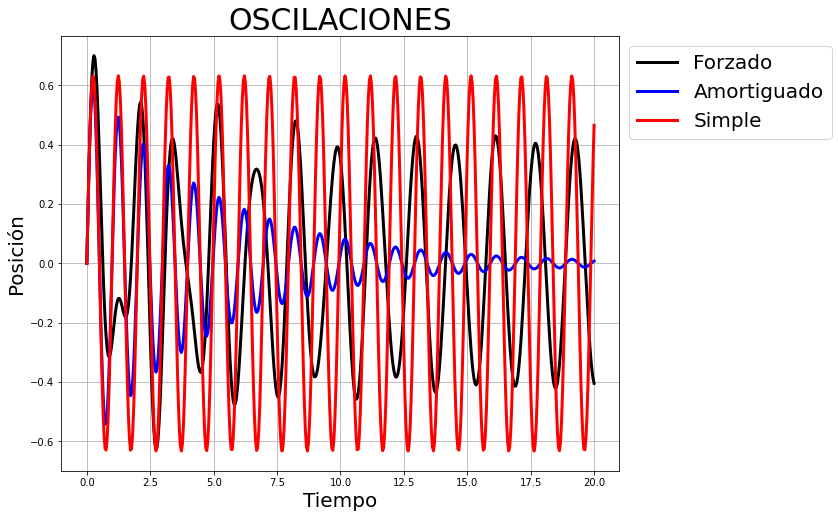

<function __main__.ma>

In [43]:
ma([0, 4], 1, 40, 0.4, 10, 4)